In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [144]:
data = pd.read_excel('Ekip3.xlsx')
data

,EKIP_ADI,BAGLI_OLDUGU_BIRIM_ID,EMAIL,EKIP_NO,IRTIBAT_TEL_NO1,GOREV_TURU_ACIKLAMA,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,BILDIRIM_ZAMANI,TAMAMLANMA_ZAMANI,GOREV_DURUM,TAMAMLAMA_SURESI
0,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14250719,389,4,2024-12-02 12:51:57,2024-12-02 17:55:18,15,0
1,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14281847,389,4,2024-12-02 11:25:02,2024-12-02 17:54:45,15,0
2,IZMIR BÖLGE TOPTAN MÜSTERI ILISKILERI,35,merve.akis@turktelekom.com.tr,232MI00002,2.325551e+09,İŞEMRİ DÜZENLEME,14282075,4999,4,2024-12-02 17:54:08,2024-12-02 17:54:17,15,0
3,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14282110,389,4,2024-12-02 15:07:18,2024-12-02 17:54:16,15,0
4,IZMIR BÖLGE TOPTAN MÜSTERI ILISKILERI,35,merve.akis@turktelekom.com.tr,232MI00002,2.325551e+09,TAHSİS DEĞERLENDİRME,14282075,4999,3,2024-12-02 16:07:23,2024-12-02 17:54:08,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,TTSOC,6,ttsoc@turktelekom.com.tr,312YGS00001,1.111111e+09,KAPAMA İPTAL,14227771,4273,12,2024-10-09 13:50:57,2024-10-09 15:48:26,15,0
69996,ANTALYA MPLS,7,ayla.incenacar@turktelekom.com.tr,242MPLS00001,2.425551e+09,TESİS,13954712,3774,5,2024-10-07 14:03:10,2024-10-09 15:48:26,15,2
69997,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,TAHSİS İPTAL,14221048,3776,11,2024-10-09 15:45:15,2024-10-09 15:48:23,15,0
69998,İSTANBUL SSG RSMC,34,NaN,216SSGRSMC00001,2.122113e+09,DEVRE TOPLAMA,14228333,4301,7,2024-10-09 15:45:39,2024-10-09 15:48:11,15,0


In [216]:
data.drop_duplicates(inplace=True)
data

,EKIP_ADI,BAGLI_OLDUGU_BIRIM_ID,EMAIL,EKIP_NO,IRTIBAT_TEL_NO1,GOREV_TURU_ACIKLAMA,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,BILDIRIM_ZAMANI,TAMAMLANMA_ZAMANI,GOREV_DURUM,TAMAMLAMA_SURESI
0,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14250719,389,4,2024-12-02 12:51:57,2024-12-02 17:55:18,15,0
1,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14281847,389,4,2024-12-02 11:25:02,2024-12-02 17:54:45,15,0
2,IZMIR BÖLGE TOPTAN MÜSTERI ILISKILERI,35,merve.akis@turktelekom.com.tr,232MI00002,2.325551e+09,İŞEMRİ DÜZENLEME,14282075,4999,4,2024-12-02 17:54:08,2024-12-02 17:54:17,15,0
3,ANTALYA MÜŞTERİ İLİŞKİLERİ,7,yusuf_colak@turktelekom.com.tr,242Mİ00001,5.058287e+09,İŞEMRİ DÜZENLEME,14282110,389,4,2024-12-02 15:07:18,2024-12-02 17:54:16,15,0
4,IZMIR BÖLGE TOPTAN MÜSTERI ILISKILERI,35,merve.akis@turktelekom.com.tr,232MI00002,2.325551e+09,TAHSİS DEĞERLENDİRME,14282075,4999,3,2024-12-02 16:07:23,2024-12-02 17:54:08,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,TTSOC,6,ttsoc@turktelekom.com.tr,312YGS00001,1.111111e+09,KAPAMA İPTAL,14227771,4273,12,2024-10-09 13:50:57,2024-10-09 15:48:26,15,0
69996,ANTALYA MPLS,7,ayla.incenacar@turktelekom.com.tr,242MPLS00001,2.425551e+09,TESİS,13954712,3774,5,2024-10-07 14:03:10,2024-10-09 15:48:26,15,2
69997,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,TAHSİS İPTAL,14221048,3776,11,2024-10-09 15:45:15,2024-10-09 15:48:23,15,0
69998,İSTANBUL SSG RSMC,34,NaN,216SSGRSMC00001,2.122113e+09,DEVRE TOPLAMA,14228333,4301,7,2024-10-09 15:45:39,2024-10-09 15:48:11,15,0


In [217]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:], data.iloc[:, 12:], 
                                                    test_size = 0.2, random_state=42)

In [219]:
train_df = X_train.copy()
train_df['TAMAMLAMA_SURESI'] = y_train
def condition(x):
    if x <= 1:   
        return 1
    elif 1< x <= 10:
        return 2
    elif x>10 :
        return 3

train_df['TAMAMLANMA_HIZI'] = train_df['TAMAMLAMA_SURESI'].apply(condition)

train_df.head()

,EKIP_ADI,BAGLI_OLDUGU_BIRIM_ID,EMAIL,EKIP_NO,IRTIBAT_TEL_NO1,GOREV_TURU_ACIKLAMA,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,BILDIRIM_ZAMANI,TAMAMLANMA_ZAMANI,GOREV_DURUM,TAMAMLAMA_SURESI,TAMAMLANMA_HIZI
47339,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,TAHSİS,14245357,3776,1,2024-10-24 15:06:48,2024-10-24 15:14:14,15,0,1
67456,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,PVC DEGISIKLIK,14228104,3779,19,2024-10-09 14:48:44,2024-10-10 17:24:08,15,1,1
12309,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,SERVİSE VERİLİŞ,14271297,3779,6,2024-11-25 10:52:31,2024-11-25 10:52:32,15,0,1
52335,ANKARA MPLS NMS,6,umit.yapici@turktelekom.com.tr,312MPLS NMS00001,5.067109e+09,PVC DEGISIKLIK,14242326,3801,19,2024-10-22 10:45:06,2024-10-22 10:50:46,15,0,1
664,İSTANBUL SSG RSMC,34,NaN,216SSGRSMC00001,2.122113e+09,OTOMATİK TAHSİS,14282084,4301,13,2024-12-02 14:56:03,2024-12-02 15:18:26,15,0,1


In [220]:
train_df.drop_duplicates(inplace=True)

In [221]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55999 entries, 47339 to 15796
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EKIP_ADI               55999 non-null  object        
 1   BAGLI_OLDUGU_BIRIM_ID  55999 non-null  int64         
 2   EMAIL                  48180 non-null  object        
 3   EKIP_NO                55999 non-null  object        
 4   IRTIBAT_TEL_NO1        55971 non-null  float64       
 5   GOREV_TURU_ACIKLAMA    55999 non-null  object        
 6   ISEMRI_ID              55999 non-null  int64         
 7   EKIP_ID                55999 non-null  int64         
 8   GOREV_TURU_ID          55999 non-null  int64         
 9   BILDIRIM_ZAMANI        55999 non-null  datetime64[ns]
 10  TAMAMLANMA_ZAMANI      55999 non-null  datetime64[ns]
 11  GOREV_DURUM            55999 non-null  int64         
 12  TAMAMLAMA_SURESI       55999 non-null  int64         
 13  TA

In [222]:
train_df = train_df.dropna(subset = ['EMAIL'])

In [223]:
train_df['TAMAMLAMA_SURESI']

47339    0
67456    1
12309    0
52335    0
21004    0
        ..
37195    0
6265     0
54887    0
860      0
15796    0
Name: TAMAMLAMA_SURESI, Length: 48180, dtype: int64

In [224]:
train_df

,EKIP_ADI,BAGLI_OLDUGU_BIRIM_ID,EMAIL,EKIP_NO,IRTIBAT_TEL_NO1,GOREV_TURU_ACIKLAMA,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,BILDIRIM_ZAMANI,TAMAMLANMA_ZAMANI,GOREV_DURUM,TAMAMLAMA_SURESI,TAMAMLANMA_HIZI
47339,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,TAHSİS,14245357,3776,1,2024-10-24 15:06:48,2024-10-24 15:14:14,15,0,1
67456,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,PVC DEGISIKLIK,14228104,3779,19,2024-10-09 14:48:44,2024-10-10 17:24:08,15,1,1
12309,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,SERVİSE VERİLİŞ,14271297,3779,6,2024-11-25 10:52:31,2024-11-25 10:52:32,15,0,1
52335,ANKARA MPLS NMS,6,umit.yapici@turktelekom.com.tr,312MPLS NMS00001,5.067109e+09,PVC DEGISIKLIK,14242326,3801,19,2024-10-22 10:45:06,2024-10-22 10:50:46,15,0,1
21004,ANKARA BÖLGE TOPTAN MÜSTERI ILISKILERI,6,aysel.turedi@turktelekom.com.tr,312MI00002,3.125556e+09,İŞEMRİ DÜZENLEME,14264013,4998,4,2024-11-18 09:02:21,2024-11-18 09:03:03,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37195,BOLU IL OY,14,ZAFER.OZKALEM@turktelekom.com.tr,374ILOY00001,3.745551e+09,SURVEY ONAY,14250630,4433,34,2024-11-04 10:19:33,2024-11-04 10:47:37,15,0,1
6265,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,SERVİSE VERİLİŞ,14274700,3776,6,2024-11-28 13:49:44,2024-11-28 13:50:28,15,0,1
54887,ADANA TRN RSMC,1,tufan.tuncer@turktelekom.com.tr,322TRN RSMC00001,5.066929e+09,TESİS,14229192,521,5,2024-10-21 09:59:45,2024-10-21 11:29:21,15,0,1
860,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,PVC DEGISIKLIK,14282024,3776,19,2024-12-02 14:22:20,2024-12-02 14:26:23,15,0,1


In [225]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, 0:], train_df.iloc[:, 13:], 
                                                    test_size = 0.2, random_state=42)

In [226]:
y_train

,TAMAMLANMA_HIZI
6017,1
2342,2
51159,1
4720,2
23468,1
...,...
39752,1
52733,1
33539,1
58631,1


In [227]:
X_train

,EKIP_ADI,BAGLI_OLDUGU_BIRIM_ID,EMAIL,EKIP_NO,IRTIBAT_TEL_NO1,GOREV_TURU_ACIKLAMA,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,BILDIRIM_ZAMANI,TAMAMLANMA_ZAMANI,GOREV_DURUM,TAMAMLAMA_SURESI,TAMAMLANMA_HIZI
6017,ANTALYA MPLS NMS,7,engin.danisman@turktelekom.com.tr,242MPLS NMS00001,5.073996e+09,TAHSİS,14273800,3783,1,2024-11-27 10:55:48,2024-11-28 15:01:48,15,1,1
2342,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,PVC DEGISIKLIK,14279655,3776,19,2024-11-30 14:16:21,2024-12-02 07:46:20,15,2,2
51159,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,PVC DEGISIKLIK,14240832,3779,19,2024-10-21 16:43:41,2024-10-22 16:17:20,15,1,1
4720,BARTIN MPLS,74,alper.aydin@turktelekom.com.tr,378MPLS00001,3.785556e+09,TESİS,14212624,3860,5,2024-11-27 13:57:55,2024-11-29 10:17:14,15,2,2
23468,İSTANBUL MPLS NMS,234,tugce.kizilay@turktelekom.com.tr,212MPLS NMS00001,2.122882e+09,SERVİSE VERİLİŞ,14232403,3776,6,2024-11-14 14:45:07,2024-11-14 15:02:29,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39752,İZMİR MPLS NMS,35,aysegul.kiraba@turktelekom.com.tr,232MPLS NMS00001,2.325551e+09,SERVİSE VERİLİŞ,14251662,3779,6,2024-11-01 08:43:25,2024-11-01 08:43:25,15,0,1
52733,ÇORUM MPLS,19,suleyman.otuk@turktelekom.com.tr,364MPLS00001,5.067642e+09,TAHSİS İPTAL,14223901,3785,11,2024-10-22 09:15:14,2024-10-22 09:28:33,15,0,1
33539,ISTANBUL BÖLGE TOPTAN MÜSTERI ILISKILERI,34,serhan.enon@turktelekom.com.tr,216MI00002,2.123094e+09,TAHSİS DEĞERLENDİRME,14257946,4997,3,2024-11-06 15:15:24,2024-11-06 15:24:01,15,0,1
58631,ISTANBUL BÖLGE TOPTAN MÜSTERI ILISKILERI,34,serhan.enon@turktelekom.com.tr,216MI00002,2.123094e+09,İŞEMRİ DÜZENLEME,14233626,4997,4,2024-10-16 09:09:59,2024-10-17 16:41:00,15,1,1


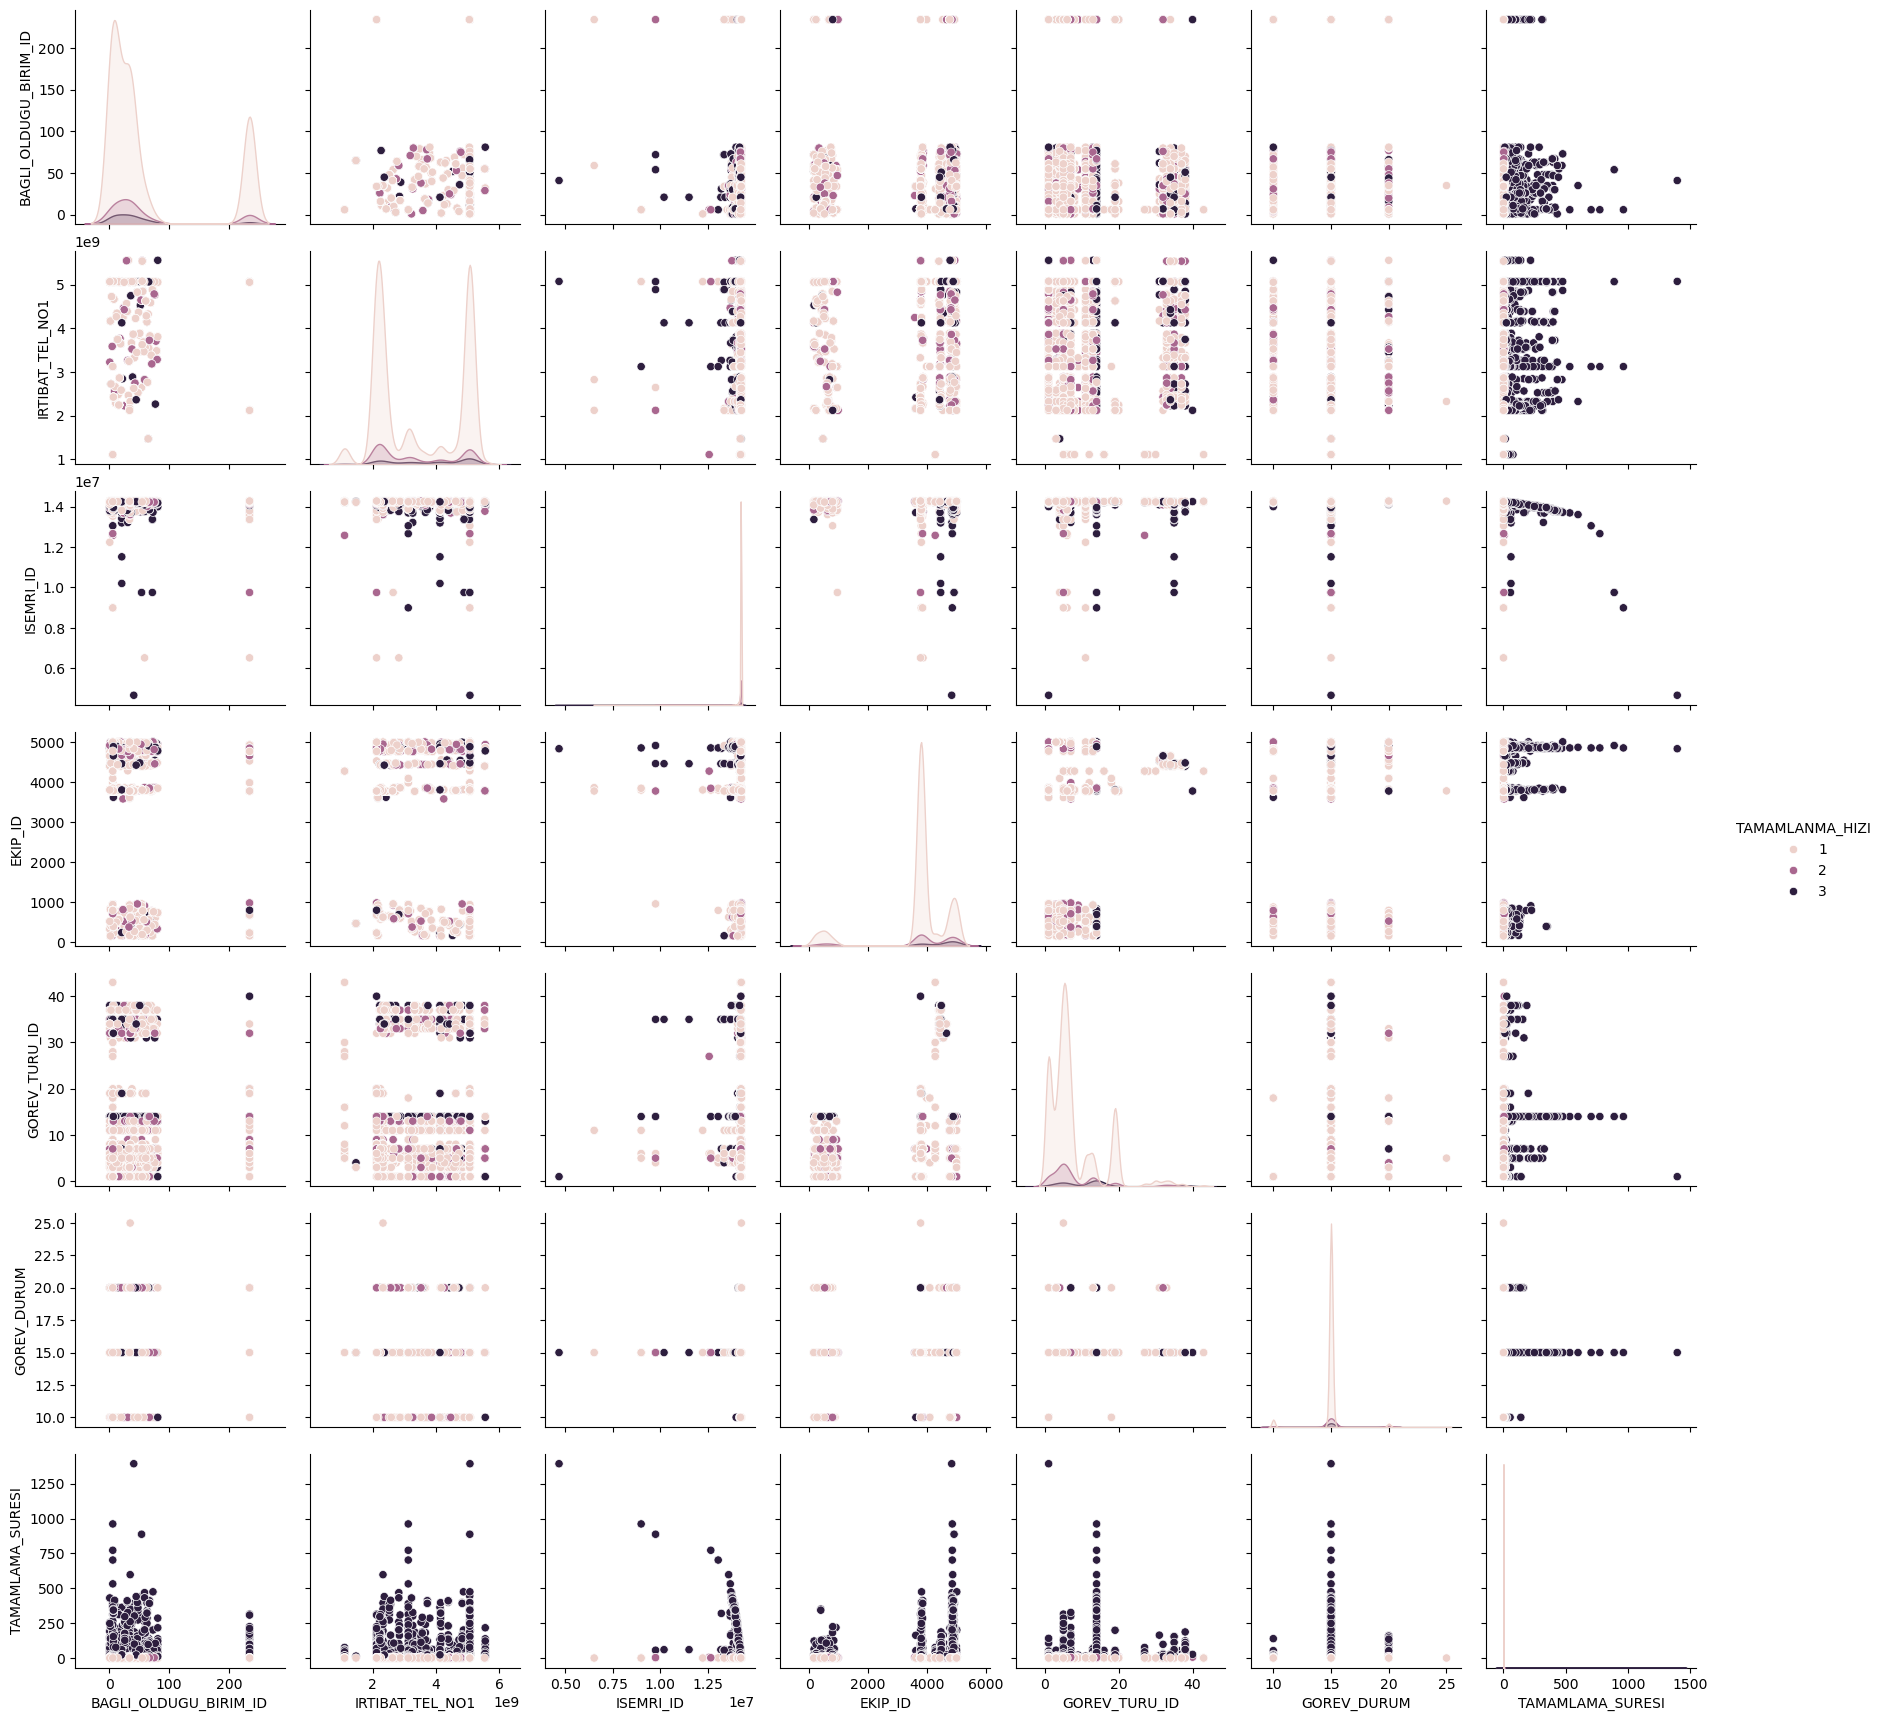

In [158]:
sns.pairplot(train_df, hue='TAMAMLANMA_HIZI');

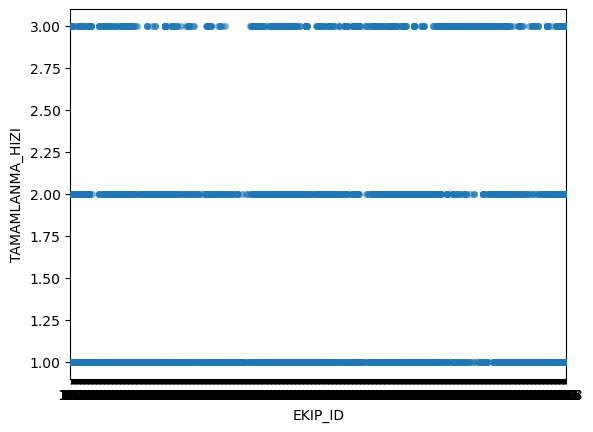

In [159]:
sns.stripplot(x='EKIP_ID', y='TAMAMLANMA_HIZI', data=train_df, alpha=0.6);

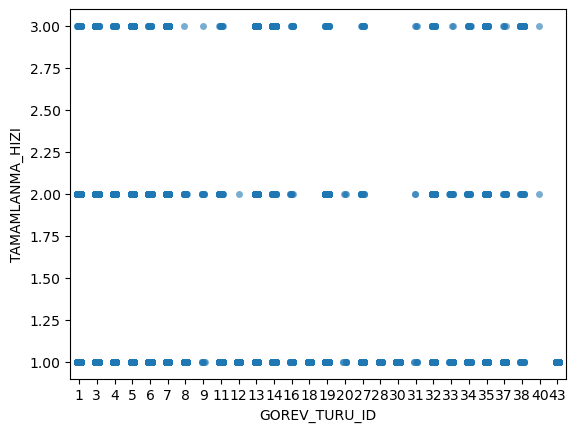

In [160]:
sns.stripplot(x='GOREV_TURU_ID', y='TAMAMLANMA_HIZI', data=train_df, alpha=0.6);

In [161]:
train_df.corr(numeric_only=True)

,BAGLI_OLDUGU_BIRIM_ID,IRTIBAT_TEL_NO1,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID,GOREV_DURUM,TAMAMLAMA_SURESI,TAMAMLANMA_HIZI
BAGLI_OLDUGU_BIRIM_ID,1.000000,-0.473209,0.030878,-0.047620,-0.003993,-0.002328,-0.040629,-0.049520
IRTIBAT_TEL_NO1,-0.473209,1.000000,-0.032024,-0.129902,-0.007670,-0.049079,0.039796,0.031529
ISEMRI_ID,0.030878,-0.032024,1.000000,-0.000860,-0.028483,-0.006866,-0.365518,-0.144119
EKIP_ID,-0.047620,-0.129902,-0.000860,1.000000,0.157569,0.023335,0.077646,0.076789
GOREV_TURU_ID,-0.003993,-0.007670,-0.028483,0.157569,1.000000,0.131445,0.110249,0.123543
GOREV_DURUM,-0.002328,-0.049079,-0.006866,0.023335,0.131445,1.000000,0.026815,0.100988
TAMAMLAMA_SURESI,-0.040629,0.039796,-0.365518,0.077646,0.110249,0.026815,1.000000,0.474967
TAMAMLANMA_HIZI,-0.049520,0.031529,-0.144119,0.076789,0.123543,0.100988,0.474967,1.000000


In [162]:
lm1 = LogisticRegression()
lm1.fit(X_train[['ISEMRI_ID']].values, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [177]:
X_train

,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID
47339,14245357,3776,1
67456,14228104,3779,19
12309,14271297,3779,6
52335,14242326,3801,19
21004,14264013,4998,4
...,...,...,...
16024,14267895,4997,3
44132,14247737,712,7
37195,14250630,4433,34
6265,14274700,3776,6


In [163]:
lm2 = LogisticRegression()
lm2.fit(X_train[['GOREV_TURU_ID']].values, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [164]:
print("Training Accuracy:", round(lm1.score(X_train[['ISEMRI_ID']].values, y_train),5))
print("Testing Accuracy:", round(lm1.score(X_test[['ISEMRI_ID']].values, y_test),5))

Training Accuracy: 0.84415
Testing Accuracy: 0.84714


In [165]:
print("Training Accuracy:", round(lm2.score(X_train[['GOREV_TURU_ID']].values, y_train),5))
print("Testing Accuracy:", round(lm2.score(X_test[['GOREV_TURU_ID']].values, y_test),5))

Training Accuracy: 0.84415
Testing Accuracy: 0.84714


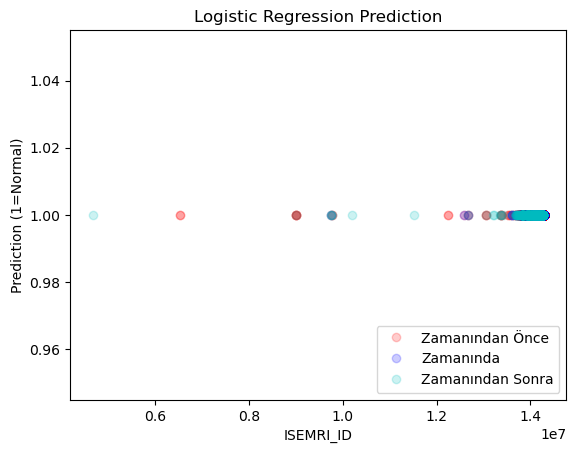

In [166]:
feature = train_df['ISEMRI_ID'].values.reshape(-1,1) # Eğitimde kullandığım özellikler
y_pred_train = lm1.predict(feature) # Bu özellikleri input olarak kullanarak tahmin gerçekleştirme

sf_mask = (train_df['TAMAMLANMA_HIZI'] == 1)
sf_mask2 = (train_df['TAMAMLANMA_HIZI'] == 2)
sf_mask3 = (train_df['TAMAMLANMA_HIZI'] == 3)

plt.plot(feature[sf_mask], y_pred_train[sf_mask], 'ro', label='Zamanından Önce', alpha=0.2)
plt.plot(feature[sf_mask2], y_pred_train[sf_mask2], 'bo', label='Zamanında', alpha=0.2)
plt.plot(feature[sf_mask3], y_pred_train[sf_mask3], 'co', label='Zamanından Sonra', alpha=0.2)
plt.xlabel('ISEMRI_ID')
plt.ylabel('Prediction (1=Normal)')
plt.title('Logistic Regression Prediction')
plt.legend(loc='lower right');

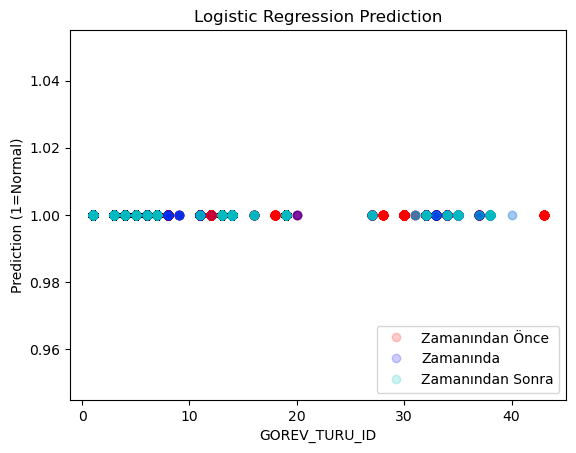

In [167]:
feature = train_df['GOREV_TURU_ID'].values.reshape(-1,1) # Eğitimde kullandığım özellikler
y_pred_train = lm2.predict(feature) # Bu özellikleri input olarak kullanarak tahmin gerçekleştirme

sf_mask = (train_df['TAMAMLANMA_HIZI'] == 1)
sf_mask2 = (train_df['TAMAMLANMA_HIZI'] == 2)
sf_mask3 = (train_df['TAMAMLANMA_HIZI'] == 3)

plt.plot(feature[sf_mask], y_pred_train[sf_mask], 'ro', label='Zamanından Önce', alpha=0.2)
plt.plot(feature[sf_mask2], y_pred_train[sf_mask2], 'bo', label='Zamanında', alpha=0.2)
plt.plot(feature[sf_mask3], y_pred_train[sf_mask3], 'co', label='Zamanından Sonra', alpha=0.2)
plt.xlabel('GOREV_TURU_ID')
plt.ylabel('Prediction (1=Normal)')
plt.title('Logistic Regression Prediction')
plt.legend(loc='lower right');

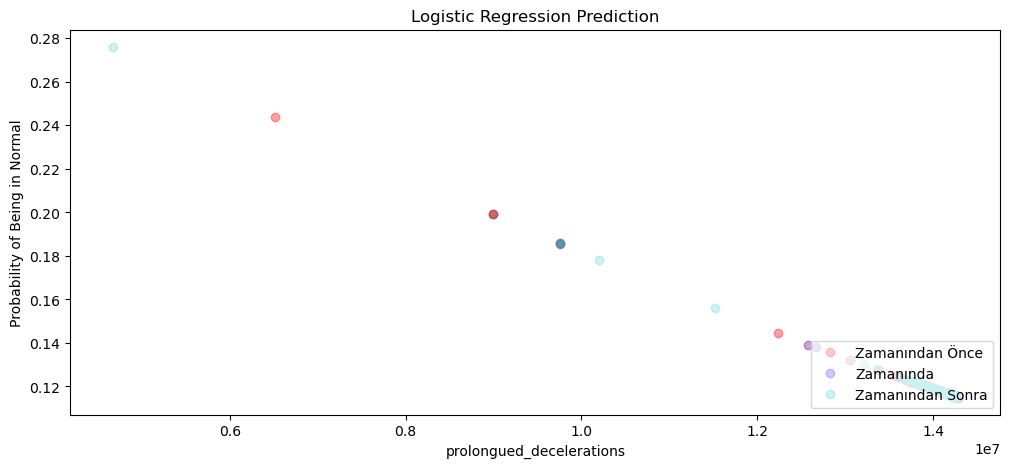

In [168]:
feature = train_df['ISEMRI_ID'].values.reshape(-1,1) 
prediction_soft = lm1.predict_proba(feature)[:, 1]
plt.figure(figsize=[12,5])

sf_mask = (train_df['TAMAMLANMA_HIZI'] == 1)
sf_mask2 = (train_df['TAMAMLANMA_HIZI'] == 2)
sf_mask3 = (train_df['TAMAMLANMA_HIZI'] == 3)

plt.plot(feature[sf_mask], prediction_soft[sf_mask], 'ro', label='Zamanından Önce', alpha=0.2)
plt.plot(feature[sf_mask2], prediction_soft[sf_mask2], 'bo', label='Zamanında', alpha=0.2)
plt.plot(feature[sf_mask3], prediction_soft[sf_mask3], 'co', label='Zamanından Sonra', alpha=0.2)



plt.xlabel('prolongued_decelerations')
plt.ylabel('Probability of Being in Normal')
plt.title('Logistic Regression Prediction')
plt.legend(loc='lower right');

In [214]:
X_train[['ISEMRI_ID', 'EKIP_ID','GOREV_TURU_ID']]

,ISEMRI_ID,EKIP_ID,GOREV_TURU_ID
6017,14273800,3783,1
2342,14279655,3776,19
51159,14240832,3779,19
4720,14212624,3860,5
23468,14232403,3776,6
...,...,...,...
39752,14251662,3779,6
52733,14223901,3785,11
33539,14257946,4997,3
58631,14233626,4997,4


In [215]:
y_train

,TAMAMLANMA_HIZI
6017,1
2342,2
51159,1
4720,2
23468,1
...,...
39752,1
52733,1
33539,1
58631,1


In [228]:
std_scale = StandardScaler()

X_train = X_train[['ISEMRI_ID', 'EKIP_ID','GOREV_TURU_ID']]

X_train_scaled = std_scale.fit_transform(X_train) # Eğitim veri seti için fit_transform

X_test = X_test[['ISEMRI_ID', 'EKIP_ID','GOREV_TURU_ID']]
X_test_scaled = std_scale.transform(X_test) # Test veri seti için transform
X_train_scaled

lm6 = LogisticRegression(solver='liblinear')
lm6.fit(X_train_scaled, y_train)
print("Training Accuracy:", round(lm6.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lm6.score(X_test_scaled, y_test),3))

Training Accuracy: 0.845
Testing Accuracy: 0.847


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [231]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(lm6, 'ekip_model7.pkl')

['ekip_model7.pkl']

In [232]:
dump(std_scale, 'ekip_scaler7.pkl')

['ekip_scaler7.pkl']

In [233]:
pd.to_pickle(train_df,'./ekip_train_df7.pkl') 

In [234]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(lm6, 'ekip_logreg_model7.pkl')

['ekip_logreg_model7.pkl']

In [235]:
y_train

,TAMAMLANMA_HIZI
6017,1
2342,2
51159,1
4720,2
23468,1
...,...
39752,1
52733,1
33539,1
58631,1
